In [1]:
import pandas as pd
import string
import numpy as np

In [2]:
loans = pd.read_csv("loans.csv")
lenders = pd.read_csv("lenders.csv")

In [3]:
loans_lenders = pd.read_csv('loans_lenders.csv')

In [4]:
#remove "#"
def remove_punctuation(s):
    punctuation_remover = str.maketrans('', '', '#')
    return s.strip().translate(punctuation_remover)

In [5]:
#create a dictionary {tags:[loans_id]}
loans_tag = [remove_punctuation(str(item)).split(", ") for item in loans["TAGS"]]
tag_id_dict = {}
for i in range(len(loans_tag) -1):
    for item in loans_tag[i]:
        if item not in tag_id_dict.keys():
            tag_id_dict.setdefault(item,[]).append(loans["LOAN_ID"][i])
        else:
            tag_id_dict[item].append(loans["LOAN_ID"][i])

In [6]:
loan_payer = pd.DataFrame(loans_lenders['LENDERS'].str.split(', '))

In [7]:
loans_lenders

,LOAN_ID,LENDERS
0,572013,"aaron6136, suzette9319, sophia8549, jessica761..."
1,509279,"nick5848, elize3658, alex6186, jensfredrik9195..."
2,90715,"maggie7526, harish3790, stephen3381, lynette58..."
3,377330,"paddy3814, matthewpeters, jaclyn8905, ramius65..."
4,504951,"shawn8447, shawn8447, evancarmichael, yaro5069..."
...,...,...
1998472,1996513,"mallory5472, shiekhah, thehollypeck, imad3393"
1998473,2011573,"bob4739, william35124246, manon3668, michaelir..."
1998474,2011764,"ann86371901, rotaryclub4823, keyvan9314, zohar..."
1998475,2012621,"opajan9527, lendiogives, hans3822, gooddogg1, ..."


In [8]:
#find the number of loan funded for each tag
tag_funded_dict = {key: 0 for key in tag_id_dict}
for i in range(len(loans_tag) -1):
    if loans['STATUS'][i] == 'funded':
        for item in loans_tag[i]:
            tag_funded_dict[item] = tag_funded_dict[item] + 1

In [9]:
#find the average contribution: i.e. avg amount/ avg lenders (I don't know if that indicates anything)
tag_lenders_dict = {key: 0 for key in tag_id_dict}
for i in range(len(loans_tag) -1):
    for item in loans_tag[i]:
        tag_lenders_dict[item] = tag_lenders_dict[item] + int(loans['NUM_LENDERS_TOTAL'][i])
tag_amount_dict = {key: 0 for key in tag_id_dict}
for i in range(len(loans_tag) -1):
    for item in loans_tag[i]:
        tag_amount_dict[item] = tag_amount_dict[item] + int(loans['FUNDED_AMOUNT'][i])
tag_average_dict = {key :tag_amount_dict[key]/tag_lenders_dict[key] for key in tag_id_dict}

In [10]:
#how quickly the loans were filled(need more data)

In [11]:
#loan amount standard deviation(need more data)

In [12]:
#number of time the home page is visited(need more data)

In [13]:
loans_popularity=pd.DataFrame()
loans_popularity['TAGS'] = tag_id_dict.keys()
loans_popularity['TOTAL_TAGS_COUNT'] = [len(item) for item in tag_id_dict.values()]
loans_popularity['PERCENT_EACH_TAG'] = (loans_popularity['TOTAL_TAGS_COUNT']/len(loans_tag)).astype('string')
loans_popularity['TOTAL_FUNDED_COUNT'] = [item for item in tag_funded_dict.values()]
loans_popularity['PERCENT_FUNDED_COUNT'] = loans_popularity['TOTAL_FUNDED_COUNT']/loans_popularity['TOTAL_TAGS_COUNT']
loans_popularity['AVERAGE_AMOUNT_LOAN'] = [item for item in tag_average_dict.values()]

In [14]:
#strip the tags that have counts less than 1000
mid_loans_table = loans_popularity[loans_popularity['TOTAL_TAGS_COUNT'] > 1000]
#strip 'user_favorite' tag
mid_loans_table = mid_loans_table.drop([2])
mid_loans_table

,TAGS,TOTAL_TAGS_COUNT,PERCENT_EACH_TAG,TOTAL_FUNDED_COUNT,PERCENT_FUNDED_COUNT,AVERAGE_AMOUNT_LOAN
0,nan,929881,0.45282119357515455,907158,0.975564,35.680729
1,Repeat Borrower,258460,0.12586144430463087,236382,0.914579,37.373370
3,Woman-Owned Business,446190,0.2172797254286282,413828,0.927470,37.876129
4,Biz Durable Asset,96503,0.04699375903323451,85257,0.883465,35.694327
5,Parent,459027,0.22353091849733728,409851,0.892869,35.851885
6,Unique,10218,0.004975826967053773,9249,0.905167,36.479225
7,Elderly,176938,0.08616293520224706,162284,0.917180,36.213472
8,Vegan,105916,0.05157757771016514,93991,0.887411,35.532832
9,Schooling,137229,0.06682596974572541,126851,0.924375,34.965389
10,Repair Renew Replace,39515,0.019242493893436078,33451,0.846539,36.104661


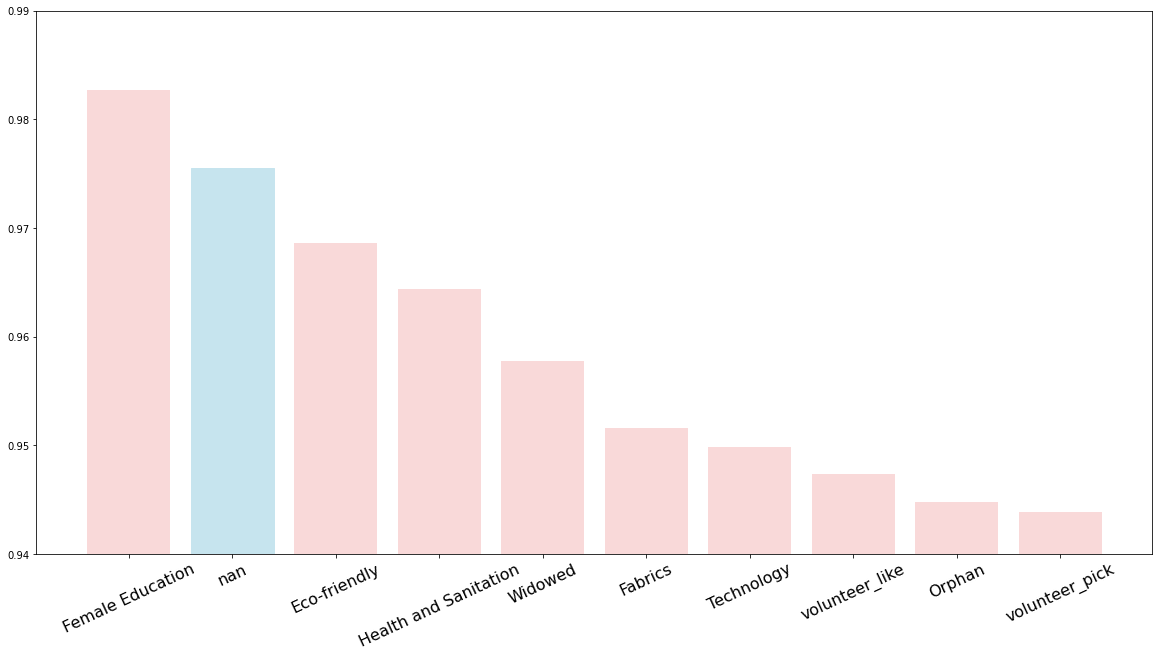

In [17]:
#Top 10 Percent Loan Funded by Tags
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.ylim([0.94,0.99])
#plt.ylabel('Percent of loans funded',fontweight='bold')
#plt.xlabel('tags',fontweight='bold')
#plt.title('Top 10 Percent Loan Funded by Tags')
loans_fund=mid_loans_table.sort_values(by=['PERCENT_FUNDED_COUNT'], ascending=False).head(10)
barlist = plt.bar(loans_fund['TAGS'],loans_fund['PERCENT_FUNDED_COUNT'], width = 0.8,color ='#F9D9D9')
barlist[1].set_color('#C6E4EE')
plt.yticks(fontsize = 10)
plt.xticks(fontsize=16,rotation = 25) 
plt.savefig('top_loan_fund.png', dpi = 1200)

In [ ]:
#Bottom 10 Percent Loan Funded by Tags
plt.figure(figsize=(20,10))
plt.ylim([0.84,0.90])
plt.ylabel('Percent of loans funded')
plt.xlabel('tags')
plt.title('Bottom 10 Percent Loan Funded by Tags')
loans_fund=mid_loans_table.sort_values(by=['PERCENT_FUNDED_COUNT'], ascending=True).head(10)
barlist = plt.bar(loans_fund['TAGS'],loans_fund['PERCENT_FUNDED_COUNT'], width = 0.8)

In [ ]:
plt.figure(figsize=(20,10))
plt.ylim([35.75,38])
#plt.ylabel('Average Loan Amount',fontweight='bold')
#plt.xlabel('tags',fontweight='bold')
#plt.title('Top 10 Average Loan Amount by Tags')
loans_fund=mid_loans_table.sort_values(by=['AVERAGE_AMOUNT_LOAN'], ascending=False).head(10)
barlist = plt.bar(loans_fund['TAGS'],loans_fund['AVERAGE_AMOUNT_LOAN'], width = 0.8,color ='#D8556C')
plt.yticks(fontsize = 10)
plt.xticks(fontsize=16,rotation = 20) 
plt.savefig('top_loan_amount.png')

In [ ]:
plt.figure(figsize=(20,10))
plt.ylim([32,34.5])
plt.ylabel('Average Loan Amount',fontweight='bold')
plt.xlabel('tags')
plt.title('Bottom 10 Average Loan Amount by Tags')
loans_fund=mid_loans_table.sort_values(by=['AVERAGE_AMOUNT_LOAN'], ascending=True).head(10)
barlist = plt.bar(loans_fund['TAGS'],loans_fund['AVERAGE_AMOUNT_LOAN'], width = 0.8)

In [ ]:
# No correlation between %funded and avg amount of loan
plt.scatter(mid_loans_table['PERCENT_FUNDED_COUNT'], mid_loans_table['AVERAGE_AMOUNT_LOAN'])

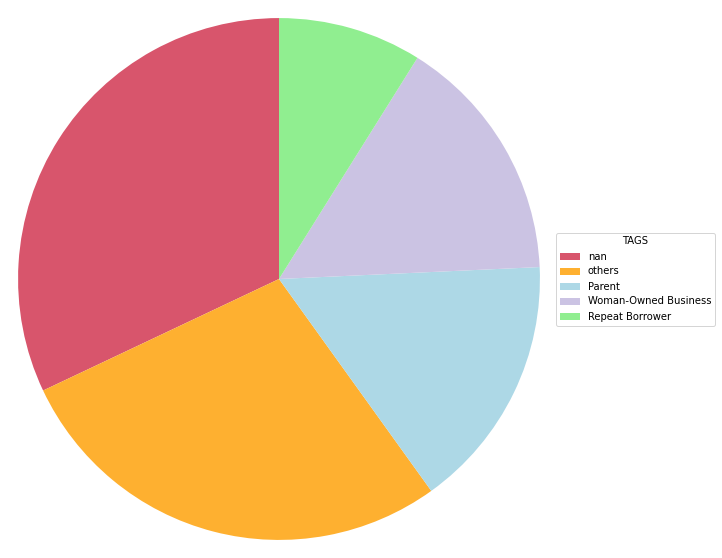

In [22]:
#loan tags distribution
loans_distribution=mid_loans_table.sort_values(by=['TOTAL_TAGS_COUNT'], ascending=False).head(9)

#add 'others'
loans_distribution.loc[len(loans_distribution.index)] = ['others',sum(mid_loans_table['TOTAL_TAGS_COUNT']) - sum(loans_distribution['TOTAL_TAGS_COUNT']),'0','0','0','0'] 
loans_distribution=loans_distribution.sort_values(by=['TOTAL_TAGS_COUNT'], ascending=False)

plt.figure(figsize=(20,10))
wedges, texts, autotexts = plt.pie(loans_distribution['TOTAL_TAGS_COUNT'][0:5],colors =['#D8556C','#FEB030','#ADD8E6','#CBC3E3','#90EE90','#C4A484','#ffcccb','#41AADE','#F0F8FF'],autopct='', radius = 1.2, shadow = False, startangle=90)
plt.legend(wedges, loans_distribution['TAGS'][0:5],
          title="TAGS",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight="bold")
#plt.title('Top 10 loan tags distribution')
plt.savefig('loan_tags_distribution')

In [26]:
loans_distribution.to_csv('loan distribution.csv')